In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/diamonds.csv")

In [ ]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data = data[data['z'] != 'g']
data['z'] = data['z'].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53946 entries, 0 to 53946
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53946 non-null  int64  
 1   carat       53946 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53945 non-null  object 
 4   clarity     53946 non-null  object 
 5   depth       53945 non-null  float64
 6   table       53946 non-null  float64
 7   price       53946 non-null  int64  
 8   x           53946 non-null  float64
 9   y           53946 non-null  float64
 10  z           53946 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.9+ MB


In [ ]:
data.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53946.000000,53946.000000,53943,53945,53946,53945.000000,53946.000000,53946.000000,53946.000000,53946.000000,53946.000000
unique,NaN,NaN,8,8,11,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21548,11293,13063,NaN,NaN,NaN,NaN,NaN,NaN
mean,26973.481444,0.797937,NaN,NaN,NaN,61.749256,57.457152,3932.633337,5.731178,5.734547,3.538729
std,15573.044691,0.473985,NaN,NaN,NaN,1.432579,2.234438,3989.268422,1.121701,1.142073,0.705664
min,0.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,-200.000000,0.000000,0.000000,0.000000
25%,13487.250000,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40459.750000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000


In [ ]:
print(data.isnull().sum())

Unnamed: 0    0
carat         0
cut           3
color         1
clarity       0
depth         1
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [ ]:
data.dropna(inplace=True)


In [ ]:
data.drop(data['price'][data['price']<0].index, inplace=True )

In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D', '87'], dtype=object)

In [ ]:
data = data[data['color'] != '87']


In [ ]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
data = data[data['clarity'] != '8']
data['clarity'] = data['clarity'].replace({'vs2': 'VS2'})

In [ ]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', '7y', 'IF'],
      dtype=object)

In [ ]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
data['cut'] = data['cut'].replace({'very good': 'Very Good','good': 'Good','ideal': 'Ideal','premium': 'Premium'})


In [ ]:
print(data.isnull().sum())


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


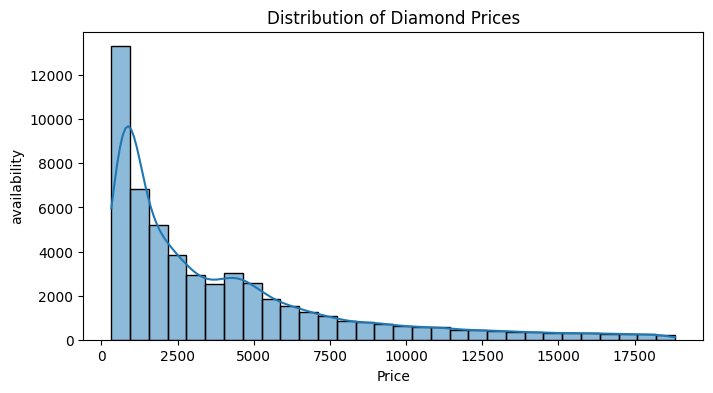

In [ ]:

plt.figure(figsize=(8, 4))
sns.histplot(data['price'], bins=30, kde=True)
plt.title("Distribution of Diamond Prices")
plt.xlabel("Price")
plt.ylabel("availability")
plt.show()
# there are so many cheap diamonds (price less than 5k)
# few expensive diamonds (price more than 5k)
# right skewed ==prices are concerntrated in the last end of the plot

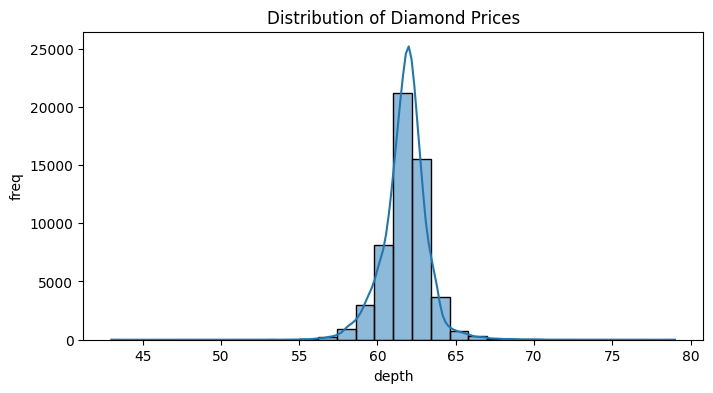

In [ ]:


plt.figure(figsize=(8, 4))
sns.histplot(data['depth'], bins=30, kde=True)
plt.title("Distribution of Diamond Prices")
plt.xlabel("depth")
plt.ylabel("freq")
plt.show()
# most are concentrated in the middle
# there some outlairs left and right(45:55  &  68:80)

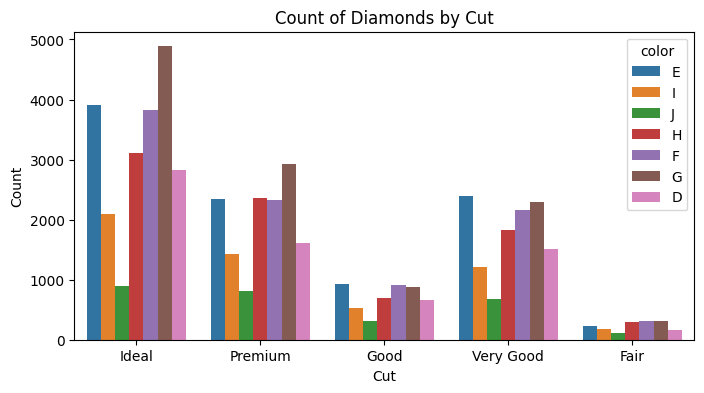

In [ ]:

plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='cut',hue='color')

plt.title("Count of Diamonds by Cut")
plt.xlabel("Cut")
plt.ylabel("Count")
plt.show()
# the number of ideal cut is alot
# the number of mid cut (prem,Very good) are common
# the number of low cut(fair,good) are rare

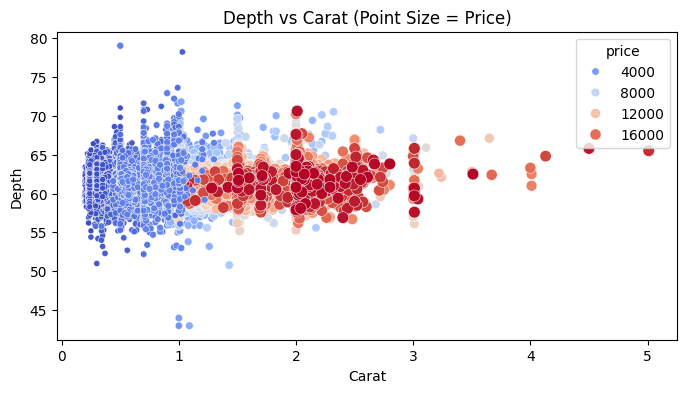

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=data,
    x='carat', y='depth',
    size='price',
    hue='price',
     palette='coolwarm',
    legend=True
)
plt.title("Depth vs Carat (Point Size = Price)")
plt.xlabel("Carat")
plt.ylabel("Depth")
plt.show()
# big carat is so expensive
# diamonds average depth are in range 55-65
# there are some outlers some big points in the left side

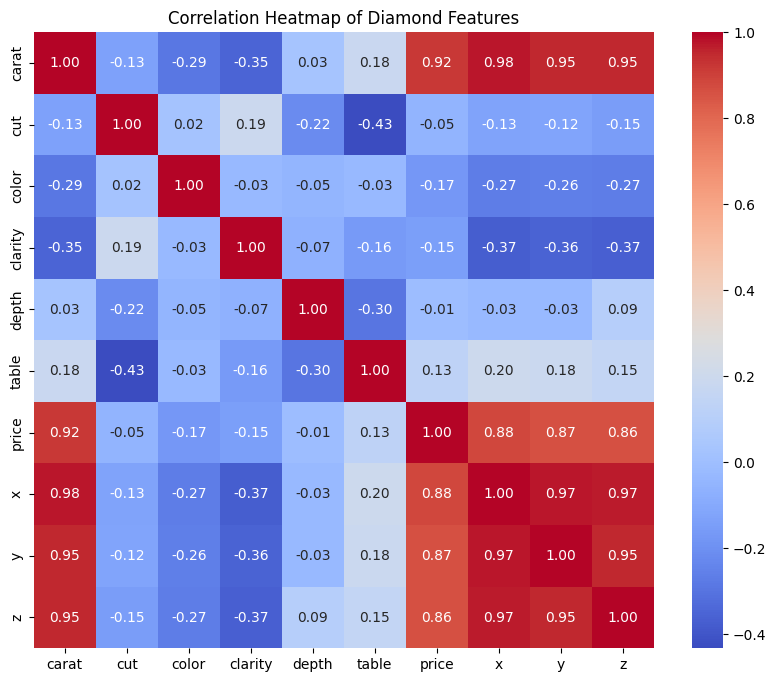

In [ ]:
cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_mapping = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
clarity_mapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

data['cut'] = data['cut'].map(cut_mapping)
data['color'] = data['color'].map(color_mapping)
data['clarity'] = data['clarity'].map(clarity_mapping)

corr = data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Diamond Features")
plt.show()


# carat has the highest positive correlation with price (0.92).
# Bigger diamonds  cost way more.
#########
#Lower numeric (after incoding) color values (better color grades) are  more expensive.
#########
# Depth and table size show very low correlation with price.
#########
# Carat also correlates with dimensions x, y, and z (length, width, depth) obviously!!!!